# Day 7 — Batch Normalization & Dropout in CNNs
We extend our CNN on CIFAR-10 with BN + Dropout for stability & regularization.

## Step 1: Load Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers #type:ignore
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## Step 2: Define Model with BatchNorm + Dropout

In [2]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), padding="same", input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])
model.summary()

d:\40-Days-DL-MLOps\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,071,178 (4.09 MB)

 Trainable params: 1,070,986 (4.09 MB)

 Non-trainable params: 192 (768.00 B)

## Step 3: Compile & Train

In [3]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - accuracy: 0.3361 - loss: 1.7958 - val_accuracy: 0.3721 - val_loss: 1.9324
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.4460 - loss: 1.4839 - val_accuracy: 0.3883 - val_loss: 1.7864
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.4959 - loss: 1.3593 - val_accuracy: 0.6150 - val_loss: 1.0956
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 97ms/step - accuracy: 0.5219 - loss: 1.2977 - val_accuracy: 0.5566 - val_loss: 1.2012
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 98ms/step - accuracy: 0.5408 - loss: 1.2430 - val_accuracy: 0.5618 - val_loss: 1.2691
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.5519 - loss: 1.2073 - val_accuracy: 0.6496 - val_loss: 1.0635
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 99ms/step - accuracy: 0.5677 - loss: 1.1697 - val_accuracy: 0.5075 - val_loss: 1.4739
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.5802 - loss: 1.1385 - 

## Step 4: Plot Training vs Validation Accuracy

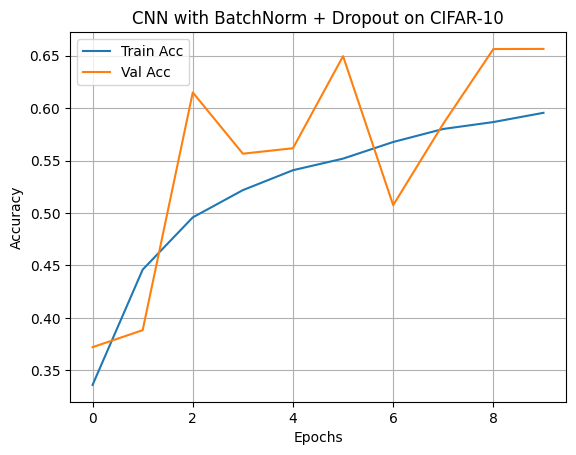

In [4]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("CNN with BatchNorm + Dropout on CIFAR-10")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Evaluate Final Model

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final Test Accuracy:", test_acc)

Final Test Accuracy: 0.656499981880188
